<a href="https://colab.research.google.com/github/deebtarmizi104/Developer-Data-Stats-Analysis-using-PySpark-with-Apache-Spark/blob/main/Developer_Data_Stats_Analysis_using_PySpark_%26_Apache_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install java
! apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark 
! wget -q https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar -xvf spark-3.2.0-bin-hadoop3.2.tgz

!pip install -q findspark

spark-3.2.0-bin-hadoop3.2/
spark-3.2.0-bin-hadoop3.2/NOTICE
spark-3.2.0-bin-hadoop3.2/kubernetes/
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/python_executable_check.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/autoscale.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/worker_memory_check.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/py_container_checks.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/decommissioning.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/pyfiles.py
spark-3.2.0-bin-hadoop3.2/kubernetes/tests/decommissioning_cleanup.py
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/decom.sh
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/entrypoint.sh
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/
spark-3.2.0-bin-hadoop3.2/kubernetes/dockerfiles/spark/bindings/R/
spark-3.2.0-bin-hadoop3.2/kubernetes/docker

In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

# Import Packages

In [3]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql.types import IntegerType
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import desc
from pyspark.sql.functions import asc
from pyspark.sql.functions import sum as Fsum
from pyspark.sql.functions import count
from pyspark.sql.functions import when
from pyspark.sql.functions import col
from pyspark.sql.functions import regexp_replace

import datetime

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
spark = SparkSession\
        .builder\
        .appName("BDATest2")\
        .getOrCreate()

In [5]:
path1 = "dataset/survey data demographics.csv"
path2 = "dataset/survey data technologies normalised.csv"

data_demo = spark.read.csv(path1, header="true")
data_tech = spark.read.csv(path2, header="true")

In [6]:
data_tech.take(5)

[Row(Respondent=None, LanguageWorkedWith=None, LanguageDesireNextYear=None, DatabaseWorkedWith=None, DatabaseDesireNextYear=None, PlatformWorkedWith=None, PlatformDesireNextYear=None, WebFrameWorkedWith=None, WebFrameDesireNextYear=None, DevEnviron=None, OpSys=None, Containers=None, BlockchainOrg=None, BlockchainIs=None),
 Row(Respondent='4', LanguageWorkedWith='C', LanguageDesireNextYear='C', DatabaseWorkedWith='MySQL', DatabaseDesireNextYear='MySQL', PlatformWorkedWith='Linux', PlatformDesireNextYear='Linux', WebFrameWorkedWith=None, WebFrameDesireNextYear=None, DevEnviron='Eclipse', OpSys=None, Containers=None, BlockchainOrg=None, BlockchainIs=None),
 Row(Respondent='4', LanguageWorkedWith='C++', LanguageDesireNextYear='C#', DatabaseWorkedWith='SQLite', DatabaseDesireNextYear='SQLite', PlatformWorkedWith='Windows', PlatformDesireNextYear='Windows', WebFrameWorkedWith=None, WebFrameDesireNextYear=None, DevEnviron='Vim', OpSys=None, Containers=None, BlockchainOrg=None, BlockchainIs=No

In [7]:
data_tech.printSchema()

root
 |-- Respondent: string (nullable = true)
 |-- LanguageWorkedWith: string (nullable = true)
 |-- LanguageDesireNextYear: string (nullable = true)
 |-- DatabaseWorkedWith: string (nullable = true)
 |-- DatabaseDesireNextYear: string (nullable = true)
 |-- PlatformWorkedWith: string (nullable = true)
 |-- PlatformDesireNextYear: string (nullable = true)
 |-- WebFrameWorkedWith: string (nullable = true)
 |-- WebFrameDesireNextYear: string (nullable = true)
 |-- DevEnviron: string (nullable = true)
 |-- OpSys: string (nullable = true)
 |-- Containers: string (nullable = true)
 |-- BlockchainOrg: string (nullable = true)
 |-- BlockchainIs: string (nullable = true)



In [8]:
data_tech.describe().show()

+-------+------------------+------------------+----------------------+------------------+----------------------+------------------+----------------------+------------------+----------------------+--------------+-----+----------+-------------+------------+
|summary|        Respondent|LanguageWorkedWith|LanguageDesireNextYear|DatabaseWorkedWith|DatabaseDesireNextYear|PlatformWorkedWith|PlatformDesireNextYear|WebFrameWorkedWith|WebFrameDesireNextYear|    DevEnviron|OpSys|Containers|BlockchainOrg|BlockchainIs|
+-------+------------------+------------------+----------------------+------------------+----------------------+------------------+----------------------+------------------+----------------------+--------------+-----+----------+-------------+------------+
|  count|             74589|             59792|                 55764|             31375|                 29575|             39208|                 44314|             24803|                 24567|         33306|    0|         0|    

In [9]:
data_tech.count()

74590

**Q1 (Descriptive) - What is the most popular development environment used by the respondents?**





In [10]:
data_tech.select("DevEnviron").dropDuplicates().show()

+------------------+
|        DevEnviron|
+------------------+
|          NetBeans|
|              Zend|
|             Emacs|
|     Visual Studio|
|      Sublime Text|
|              null|
|          IntelliJ|
|         Notepad++|
|            Komodo|
|           RStudio|
|              Atom|
|          RubyMine|
| IPython / Jupyter|
|             Xcode|
|Visual Studio Code|
|           PyCharm|
|              Coda|
|    Android Studio|
|               Vim|
|           Eclipse|
+------------------+
only showing top 20 rows



In [11]:
data_tech.select("DevEnviron").filter("DevEnviron like '%Visual Studio%'").dropDuplicates().show()

+------------------+
|        DevEnviron|
+------------------+
|     Visual Studio|
|Visual Studio Code|
+------------------+



In [12]:
data_tech = data_tech.withColumn("DevEnviron", regexp_replace('DevEnviron', "^Visual Studio$", 'Visual Studio Code'))

In [13]:
data_tech.select("DevEnviron").dropDuplicates().show(25)

+------------------+
|        DevEnviron|
+------------------+
|          NetBeans|
|              Zend|
|             Emacs|
|      Sublime Text|
|              null|
|          IntelliJ|
|         Notepad++|
|            Komodo|
|           RStudio|
|              Atom|
|          RubyMine|
| IPython / Jupyter|
|             Xcode|
|Visual Studio Code|
|           PyCharm|
|              Coda|
|    Android Studio|
|               Vim|
|           Eclipse|
|          TextMate|
|          PHPStorm|
|       Light Table|
+------------------+



In [14]:
data_tech.select("DevEnviron").filter("DevEnviron like '%Code%'").dropDuplicates().show()

+------------------+
|        DevEnviron|
+------------------+
|Visual Studio Code|
+------------------+



In [15]:
data_tech_pd = data_tech.toPandas()
developer_environment = data_tech_pd.groupby('DevEnviron').count()

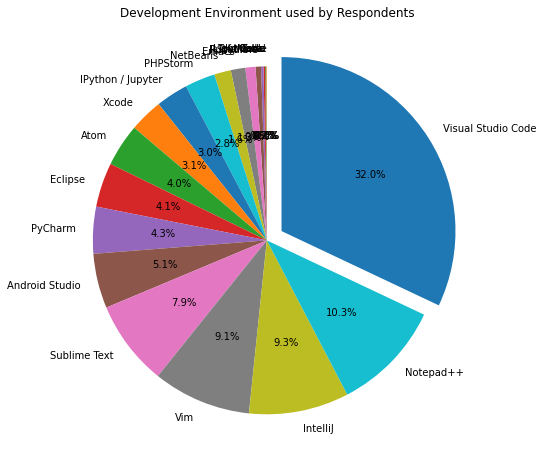

In [16]:
pie_label = developer_environment.Respondent.sort_values().index
pie_data = developer_environment.Respondent.sort_values()

explode_data = np.array(pie_data)
explode = np.zeros(len(explode_data))
explode[explode_data.argmax()] = 0.1

plt.figure(figsize=(8,8))
plt.pie(pie_data, labels=pie_label, startangle=90, autopct='%.1f%%', explode=explode)
plt.title('Development Environment used by Respondents')
plt.show()

In [17]:
data_demo.take(5)

[Row(Respondent='4', MainBranch='I am a developer by profession', Hobbyist='No', OpenSourcer='Never', OpenSource='The quality of OSS and closed source software is about the same', Employment='Employed full-time', Country='United States', Student='No', EdLevel='Bachelor’s degree (BA, BS, B.Eng., etc.)', UndergradMajor='Computer science, computer engineering, or software engineering', EduOther='Taken an online course in programming or software development (e.g. a MOOC);Received on-the-job training in software development;Taught yourself a new language, framework, or tool without taking a formal course', OrgSize='100 to 499 employees', DevType='Developer, full-stack', YearsCode='3', Age1stCode='16', YearsCodePro='Less than 1 year', CareerSat='Very satisfied', JobSat='Slightly satisfied', MgrIdiot='Very confident', MgrMoney='No', MgrWant='Not sure', JobSeek='I am not interested in new job opportunities', LastHireDate='Less than a year ago', LastInt='Write code by hand (e.g., on a whiteboar

In [18]:
data_demo.printSchema()

root
 |-- Respondent: string (nullable = true)
 |-- MainBranch: string (nullable = true)
 |-- Hobbyist: string (nullable = true)
 |-- OpenSourcer: string (nullable = true)
 |-- OpenSource: string (nullable = true)
 |-- Employment: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Student: string (nullable = true)
 |-- EdLevel: string (nullable = true)
 |-- UndergradMajor: string (nullable = true)
 |-- EduOther: string (nullable = true)
 |-- OrgSize: string (nullable = true)
 |-- DevType: string (nullable = true)
 |-- YearsCode: string (nullable = true)
 |-- Age1stCode: string (nullable = true)
 |-- YearsCodePro: string (nullable = true)
 |-- CareerSat: string (nullable = true)
 |-- JobSat: string (nullable = true)
 |-- MgrIdiot: string (nullable = true)
 |-- MgrMoney: string (nullable = true)
 |-- MgrWant: string (nullable = true)
 |-- JobSeek: string (nullable = true)
 |-- LastHireDate: string (nullable = true)
 |-- LastInt: string (nullable = true)
 |-- FizzBuzz: s

In [19]:
data_demo.describe().show()

+-------+------------------+--------------------+--------+--------------------+--------------------+------------------+-----------+--------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+-----------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------------+--------------------+--------+--------------------+--------------------+--------------+--------------+-----------------+--------+-----------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-----------------+--------------------+--------------------+--------------------+----------+--------+-----+----------------+--------------------+----------+------------------+--------------------+--------------------+--------------------+--------------------+------

In [20]:
data_demo.count()

11398

In [21]:
data_demo.select("MainBranch").dropDuplicates().show()

+--------------------+
|          MainBranch|
+--------------------+
|I am not primaril...|
|I am a developer ...|
+--------------------+



In [22]:
data_demo_pd = data_demo.toPandas()

In [23]:
data_demo = data_demo.withColumn("YearsCode", data_demo["YearsCode"].cast(IntegerType()))
data_demo = data_demo.withColumn("Age1stCode", data_demo["Age1stCode"].cast(IntegerType()))
data_demo = data_demo.withColumn("YearsCodePro", data_demo["YearsCodePro"].cast(IntegerType()))
data_demo = data_demo.withColumn("CompTotal", data_demo["CompTotal"].cast(IntegerType()))
data_demo = data_demo.withColumn("WorkWeekHrs", data_demo["WorkWeekHrs"].cast(IntegerType()))
data_demo = data_demo.withColumn("CodeRevHrs", data_demo["CodeRevHrs"].cast(IntegerType()))
data_demo = data_demo.withColumn("Age", data_demo["Age"].cast(IntegerType()))

In [24]:
data_demo.dtypes

[('Respondent', 'string'),
 ('MainBranch', 'string'),
 ('Hobbyist', 'string'),
 ('OpenSourcer', 'string'),
 ('OpenSource', 'string'),
 ('Employment', 'string'),
 ('Country', 'string'),
 ('Student', 'string'),
 ('EdLevel', 'string'),
 ('UndergradMajor', 'string'),
 ('EduOther', 'string'),
 ('OrgSize', 'string'),
 ('DevType', 'string'),
 ('YearsCode', 'int'),
 ('Age1stCode', 'int'),
 ('YearsCodePro', 'int'),
 ('CareerSat', 'string'),
 ('JobSat', 'string'),
 ('MgrIdiot', 'string'),
 ('MgrMoney', 'string'),
 ('MgrWant', 'string'),
 ('JobSeek', 'string'),
 ('LastHireDate', 'string'),
 ('LastInt', 'string'),
 ('FizzBuzz', 'string'),
 ('JobFactors', 'string'),
 ('ResumeUpdate', 'string'),
 ('CurrencySymbol', 'string'),
 ('CurrencyDesc', 'string'),
 ('CompTotal', 'int'),
 ('CompFreq', 'string'),
 ('ConvertedComp', 'string'),
 ('WorkWeekHrs', 'int'),
 ('WorkPlan', 'string'),
 ('WorkChallenge', 'string'),
 ('WorkRemote', 'string'),
 ('WorkLoc', 'string'),
 ('ImpSyn', 'string'),
 ('CodeRev', 'str

In [25]:
categoricalColumns = [ item[0] for item in data_demo.dtypes if item[1].startswith('string') ]
categoricalColumns
numericColumns = [ item[0] for item in data_demo.dtypes if item[1].startswith('int') ]
numericColumns

['YearsCode',
 'Age1stCode',
 'YearsCodePro',
 'CompTotal',
 'WorkWeekHrs',
 'CodeRevHrs',
 'Age']

**Q2 (Descriptive) - What are the age proportions of the respondent on the survey?**

In [26]:
data_demo.select("Age").dropDuplicates().show()
data_demo.select("Age").count()

data_demo.select([count(when(col('Age').isNull(),True))]).show()

+----+
| Age|
+----+
|  31|
|  65|
|  53|
|  34|
|  28|
|  26|
|  27|
|  44|
|  22|
|  47|
|null|
|  52|
|  16|
|  40|
|  20|
|  57|
|  54|
|  48|
|  19|
|  41|
+----+
only showing top 20 rows

+--------------------------------------------+
|count(CASE WHEN (Age IS NULL) THEN true END)|
+--------------------------------------------+
|                                         287|
+--------------------------------------------+



In [27]:
get_age = data_demo.groupby(data_demo.Age).count().withColumnRenamed("count","Total Count")
get_age

DataFrame[Age: int, Total Count: bigint]

In [28]:
get_age_pd = get_age.na.drop().toPandas()
get_age_pd

,Age,Total Count
0,31,531
1,65,2
2,53,32
3,34,395
4,28,787
5,26,722
6,27,722
7,44,95
8,22,406
9,47,68


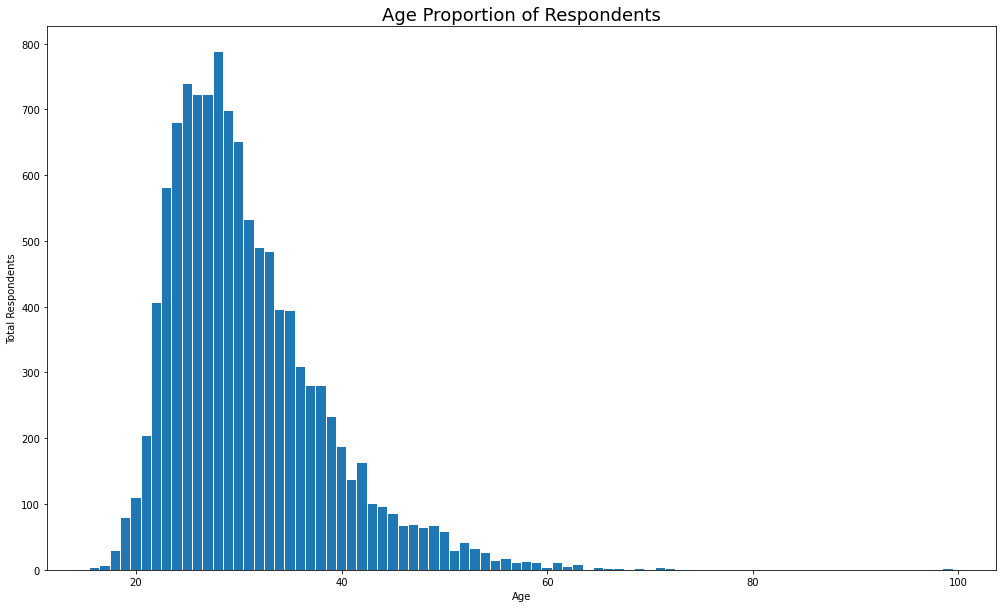

In [29]:
X = list(get_age_pd.iloc[:, 0])
Y = list(get_age_pd.iloc[:, 1])

width = 0.9

plt.figure(figsize=(17,10))

plt.bar(X, Y, width)
plt.xlabel('Age')
plt.ylabel('Total Respondents')
plt.title('Age Proportion of Respondents', fontsize = 18)
plt.show()

**Q3 (Exploratory) - Which variables has strong correlation?**

In [30]:
numeric_data = data_demo.select(numericColumns).toPandas()
numeric_data.corr()

,YearsCode,Age1stCode,YearsCodePro,CompTotal,WorkWeekHrs,CodeRevHrs,Age
YearsCode,1.000000,-0.366763,0.866690,-0.006774,0.028934,-0.028962,0.794156
Age1stCode,-0.366763,1.000000,-0.202958,0.012215,-0.010758,0.039412,-0.045419
YearsCodePro,0.866690,-0.202958,1.000000,0.009081,0.028376,-0.013592,0.834962
CompTotal,-0.006774,0.012215,0.009081,1.000000,0.003548,0.007134,0.006968
WorkWeekHrs,0.028934,-0.010758,0.028376,0.003548,1.000000,0.026393,0.036567
CodeRevHrs,-0.028962,0.039412,-0.013592,0.007134,0.026393,1.000000,-0.020084
Age,0.794156,-0.045419,0.834962,0.006968,0.036567,-0.020084,1.000000


Text(0.5, 1.0, 'Heatmap Correlation between Variables')

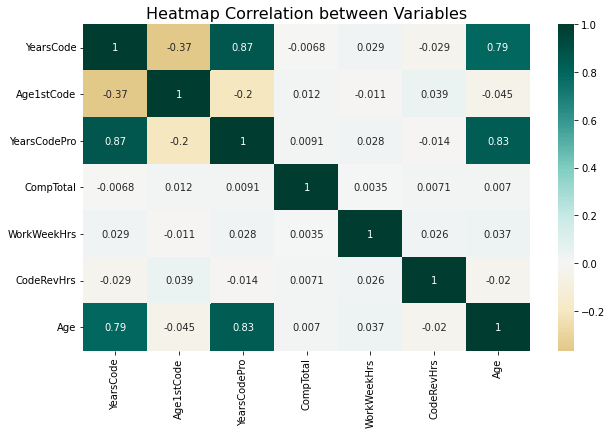

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sb.heatmap(numeric_data.corr(), center=0, cmap='BrBG', annot=True)
ax.set_title('Heatmap Correlation between Variables', fontsize=16)

**Q4 (Exploratory) - Does being a developer requires education background from CS/IT?**

In [32]:
data_demo.select("UndergradMajor").dropDuplicates().show()

+--------------------+
|      UndergradMajor|
+--------------------+
|Fine arts or perf...|
|                null|
|A health science ...|
|I never declared ...|
|Another engineeri...|
|Mathematics or st...|
|Information syste...|
|A social science ...|
|A humanities disc...|
|A natural science...|
|Web development o...|
|A business discip...|
|Computer science,...|
+--------------------+



In [33]:
get_edu_background = data_demo.groupby(data_demo.UndergradMajor).count().withColumnRenamed("count","Total Count")

In [34]:
get_edu_background.show()

+--------------------+-----------+
|      UndergradMajor|Total Count|
+--------------------+-----------+
|Fine arts or perf...|        161|
|A health science ...|         24|
|I never declared ...|        124|
|Another engineeri...|        759|
|Mathematics or st...|        372|
|Information syste...|        794|
|A social science ...|        210|
|A humanities disc...|        207|
|A natural science...|        403|
|Web development o...|        410|
|A business discip...|        244|
|Computer science,...|       6953|
|                null|        737|
+--------------------+-----------+



In [35]:
get_edu_background_pd = get_edu_background.na.drop().toPandas()
get_edu_background_pd

,UndergradMajor,Total Count
0,Fine arts or performing arts (ex. graphic desi...,161
1,"A health science (ex. nursing, pharmacy, radio...",24
2,I never declared a major,124
3,"Another engineering discipline (ex. civil, ele...",759
4,Mathematics or statistics,372
5,"Information systems, information technology, o...",794
6,"A social science (ex. anthropology, psychology...",210
7,"A humanities discipline (ex. literature, histo...",207
8,"A natural science (ex. biology, chemistry, phy...",403
9,Web development or web design,410


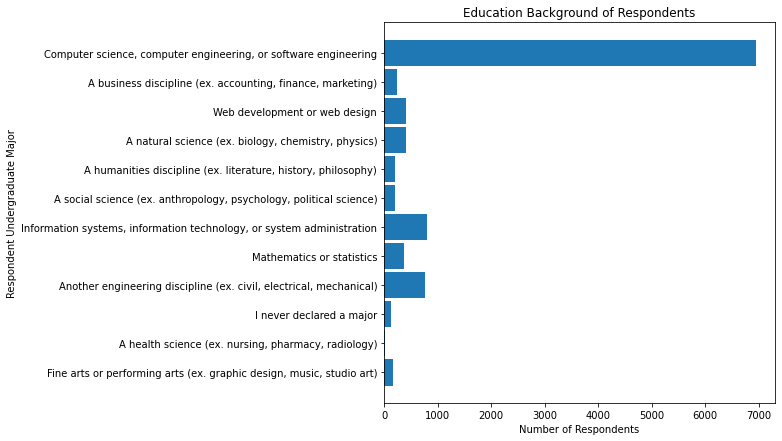

In [36]:
X = list(get_edu_background_pd.iloc[:, 0])
Y = list(get_edu_background_pd.iloc[:, 1])

width = 0.9

plt.figure(figsize=(7,7))
plt.barh(X, Y, width)
plt.xlabel('Number of Respondents')
plt.ylabel('Respondent Undergraduate Major')
plt.title('Education Background of Respondents')
plt.show()

In [37]:
#Replace the null value with the mean of the column (obtained from the previous described data)
data_demo = data_demo.fillna(value = 42, subset =['WorkWeekHrs'])

**Q5 (Inferential) - Is a developer an extrovert?**

In [38]:
data_demo.select("Extraversion").dropDuplicates().show()
data_demo.select([count(when(col('Extraversion').isNull(),True))]).show()
data_demo.select('Extraversion').count()

+--------------------+
|        Extraversion|
+--------------------+
|                null|
|             Neither|
|              Online|
|In real life (in ...|
+--------------------+

+-----------------------------------------------------+
|count(CASE WHEN (Extraversion IS NULL) THEN true END)|
+-----------------------------------------------------+
|                                                   20|
+-----------------------------------------------------+



11398

In [39]:
get_extraversion = data_demo_pd.groupby('Extraversion').count()
get_extraversion

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,BetterLife,ITperson,OffOn,SocialMedia,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Extraversion,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
In real life (in person),7162,7162,7162,7162,7106,7162,7162,7124,7098,6693,7068,7102,7123,7155,7152,7153,7162,7162,6839,6837,6840,7162,7162,6903,7144,7161,7137,7162,7162,6663,7036,6659,7094,7084,7052,7158,7150,7159,7161,5683,7142,7038,7140,7093,7140,7141,6995,6844,6959,7160,7161,7159,7130,5945,7162,6415,7156,7159,7162,7114,5926,6979,7112,7086,6862,6763,7078,7151,7156
Neither,1010,1010,1010,1010,1003,1010,1010,1008,999,924,982,999,1003,1009,1009,1010,1010,1009,968,967,968,1010,1010,955,1006,1009,1005,1010,1010,947,991,946,998,996,998,1010,1004,1009,1010,745,1008,990,1007,995,1008,1008,971,937,985,1009,1010,1010,1006,800,1010,903,1010,1009,1010,999,806,986,998,998,955,952,992,1005,1007
Online,3206,3206,3206,3206,3189,3206,3206,3195,3169,3024,3164,3181,3187,3205,3204,3199,3206,3206,3078,3077,3077,3206,3206,3109,3192,3205,3197,3206,3206,2960,3145,2958,3165,3178,3164,3202,3192,3205,3206,2525,3199,3154,3193,3193,3195,3192,3119,3096,3109,3204,3206,3206,3193,2720,3205,2933,3206,3205,3206,3180,2685,3127,3195,3171,3020,2988,3168,3203,3201


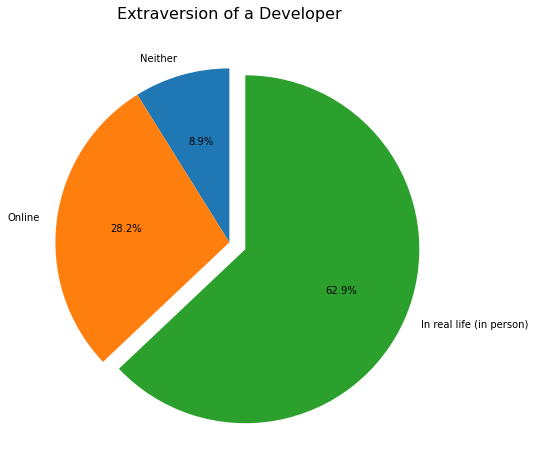

In [40]:
pie_label = get_extraversion.Respondent.sort_values().index
pie_data =  get_extraversion.Respondent.sort_values()

explode_data = np.array(pie_data)
explode = np.zeros(len(explode_data))
explode[explode_data.argmax()] = 0.1

plt.figure(figsize=(8,8))
plt.pie(pie_data, labels=pie_label, startangle=90, autopct='%.1f%%', explode=explode)
plt.title('Extraversion of a Developer', fontsize=16)
plt.show()

<!-- **Q5 (Predictive) - What will be the career satisfaction of the developer if they are a hobbyist?** -->

In [41]:
# data_demo.select("CareerSat").dropDuplicates().show()
# data_demo.select([count(when(col('CareerSat').isNull(),True))]).show()
# data_demo.select('CareerSat').count()

In [42]:
# data_demo.select("Hobbyist").dropDuplicates().show()
# data_demo.select([count(when(col('Hobbyist').isNull(),True))]).show()
# data_demo.select('Hobbyist').count()

In [43]:
# data_demo = data_demo.withColumn("CareerSat", regexp_replace('CareerSat', "^Very dissatisfied$", '1'))
# data_demo = data_demo.withColumn("CareerSat", regexp_replace('CareerSat', "^Slightly dissatisfied$", '2'))
# data_demo = data_demo.withColumn("CareerSat", regexp_replace('CareerSat', "^Neither satisfied nor dissatisfied$", '3'))
# data_demo = data_demo.withColumn("CareerSat", regexp_replace('CareerSat', "^Slightly satisfied$", '4'))
# data_demo = data_demo.withColumn("CareerSat", regexp_replace('CareerSat', "^Very satisfied$", '5'))

# data_demo = data_demo.withColumn("Hobbyist", regexp_replace('Hobbyist', "^Yes$", '1'))
# data_demo = data_demo.withColumn("Hobbyist", regexp_replace('Hobbyist', "^No$", '0'))

In [44]:
# data_demo = data_demo.withColumn("CareerSat", data_demo["CareerSat"].cast(StringType()))
# data_demo = data_demo.withColumn("Hobbyist", data_demo["Hobbyist"].cast(IntegerType()))

In [45]:
# from pyspark.ml.feature import VectorAssembler

# assembler = VectorAssembler(inputCols = [
#            'Hobbyist',
#             ], outputCol = 'features')

# output = assembler.transform(data_demo)

# data_demo_final = output.select('features', 'CareerSat' )

# data_demo_final.show()


In [46]:
# train, test = data_demo_final.randomSplit([0.7, 0,3], seed = 2018)